In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants, default_constants
from pyclouds.plotting import plot_hydrometeor_evolution
from unified_microphysics import constants as um_constants

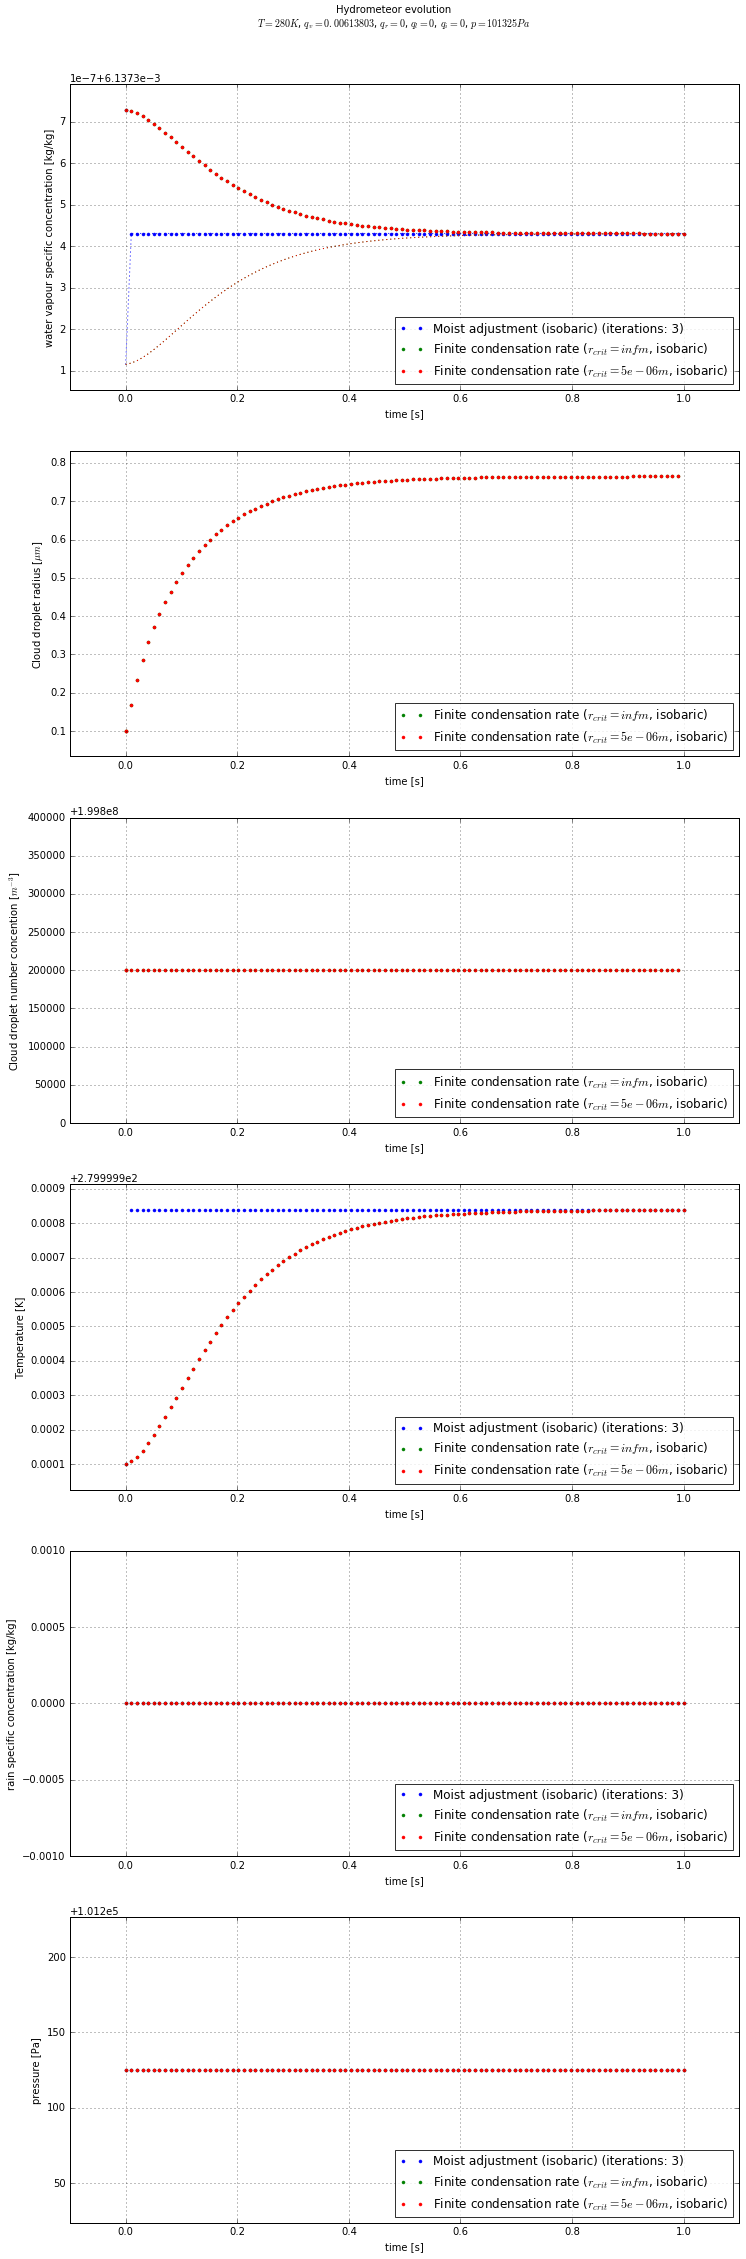

In [7]:
constants = default_constants

initial_condition = np.zeros((Var.NUM))


T0 = 280.
p0 = 101325.
initial_condition[Var.T] = T0
initial_condition[Var.p] = p0 # [Pa]

qv_sat0 = parameterisations.ParametersationsWithSpecificConstants(constants=constants).pv_sat.qv_sat(T=T0, p=p0)
super_saturation = 0.01
qv0 = (100. + super_saturation)/100.*qv_sat0

t_ = np.linspace(0., 1.0, 100)

initial_condition[Var.q_v] = qv0
initial_condition[Var.q_l] = 0.0e-2

SolverClass = odespy.Euler


kw = dict(constants=constants)
kw['model_constraint'] = 'isobaric'

solutions = []
#solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(**kw).integrate(initial_condition=initial_condition, t=t_, iterations=3))
#solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants, model_constraint='isobaric').integrate(initial_condition=initial_condition, t=t_, iterations=3))

sol_fcond = cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf, **kw).integrate(initial_condition=initial_condition, t=t_, SolverClass=SolverClass)
solutions.append(sol_fcond)

sol_fcond = cloud_microphysics.FiniteCondensationTimeMicrophysics(**kw).integrate(initial_condition=initial_condition, t=t_, SolverClass=SolverClass)
solutions.append(sol_fcond)

#sol_fcond = cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=constants).integrate(initial_condition=initial_condition, t=t_, SolverClass=SolverClass)
#solutions.append(sol_fcond)
#solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'Nc', 'T', 'q_r', 'p'], initial_condition=initial_condition)

In [4]:
sol_fcond.F[:,Var.r]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
ATHAM_constants

{'L_v': 2500800.0,
 'cp_d': 1004.64,
 'cp_i': 2103.0,
 'cp_l': 4183.0,
 'cp_v': 1870.0,
 'cv_d': 717.6,
 'cv_v': 1402.5,
 'pv_sat': {'a0_ice': 22.33,
  'a0_lq': 17.25,
  'a1_ice': -2.0,
  'a1_lq': -36.0,
  'p0vs': 610.7},
 'rho_i': 917.0,
 'rho_l': 1000.0}